<a href="https://colab.research.google.com/github/JayKalbi/Superstore_Sales_Data_Analysis/blob/main/Superstore_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Superstore Sales Data Analysis/Train.csv')

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
# filling null values
df['Postal Code'].fillna(0, inplace=True)

<ipython-input-11-15215f50daef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


In [12]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
if df.duplicated().sum() > 0:
  print('Duplicates found')
else:
  print('No duplicates found')

No duplicates found


In [15]:
# types of customers

In [16]:
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [17]:
numbers_of_customers = df['Segment'].value_counts().reset_index()
numbers_of_customers = numbers_of_customers.rename(columns={'Segment': 'Type of Customers'})
print(numbers_of_customers)

  Type of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


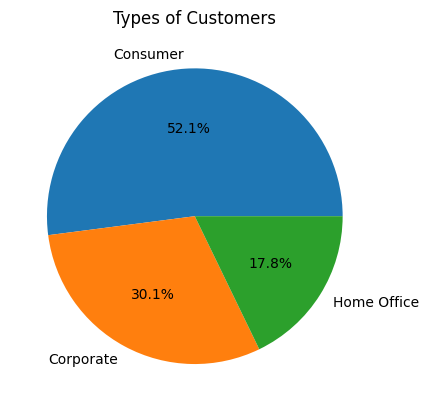

In [18]:
plt.pie(numbers_of_customers['count'], labels=numbers_of_customers['Type of Customers'], autopct='%1.1f%%')
plt.title('Types of Customers')
plt.show()

  Types of Customers   Total Sales
0           Consumer  1.148061e+06
1          Corporate  6.884941e+05
2        Home Office  4.249822e+05


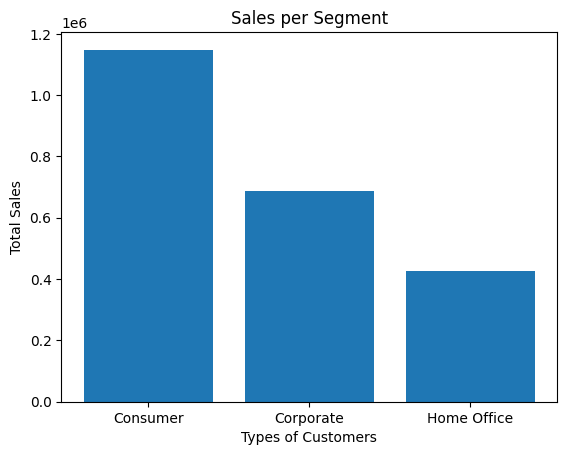

In [19]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Types of Customers', 'Sales' : 'Total Sales'})
print(sales_per_segment)

plt.bar(sales_per_segment['Types of Customers'], sales_per_segment['Total Sales'])
plt.title('Sales per Segment')
plt.xlabel('Types of Customers')
plt.ylabel('Total Sales')
plt.show()

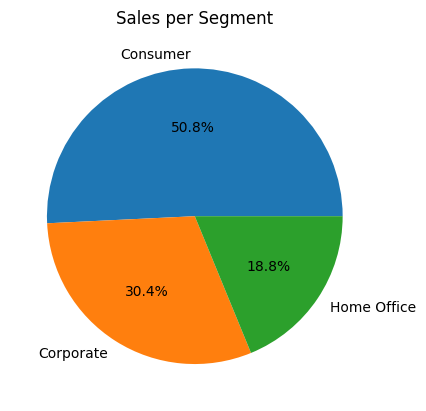

In [20]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Types of Customers'], autopct='%1.1f%%')
plt.title('Sales per Segment')
plt.show()

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

In [23]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >= 1]

In [24]:
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=True)

In [25]:
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID      Customer Name      Segment  Total Orders
0     RE-19405    Ricardo Emerson     Consumer             1
1     SC-20845         Sung Chung     Consumer             1
2     AO-10810  Anthony O'Donnell    Corporate             1
3     JR-15700     Jocasta Rupert     Consumer             1
4     LD-16855       Lela Donovan    Corporate             1
5     CJ-11875       Carl Jackson    Corporate             1
6     NB-18580     Nicole Brennan    Corporate             2
7     PH-18790  Patricia Hirasaki  Home Office             2
8     MG-18205    Mitch Gastineau    Corporate             2
9     RM-19750      Roland Murray     Consumer             2
10    AR-10570     Anemone Ratner     Consumer             2
11    TS-21085      Thais Sissman     Consumer             2


In [26]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

In [27]:
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

In [28]:
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [29]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'Index' : 'Use Frequency' , 'Ship Mode': 'Shipping Model'})
print(shipping_model)

   Shipping Model  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


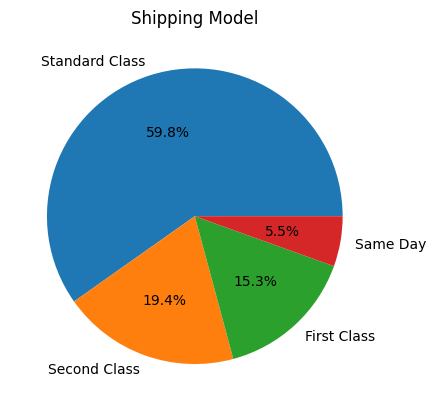

In [30]:
plt.pie(shipping_model['count'], labels=shipping_model['Shipping Model'], autopct='%1.1f%%')
plt.title('Shipping Model')
plt.show()

In [31]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'Index' : 'Use Frequency' , 'State': 'State'})
print(state.head(20))

             State  count
0       California   1946
1         New York   1097
2            Texas    973
3     Pennsylvania    582
4       Washington    504
5         Illinois    483
6             Ohio    454
7          Florida    373
8         Michigan    253
9   North Carolina    247
10        Virginia    224
11         Arizona    223
12       Tennessee    183
13        Colorado    179
14         Georgia    177
15        Kentucky    137
16         Indiana    135
17   Massachusetts    135
18          Oregon    122
19      New Jersey    122


In [32]:
city = df['City'].value_counts().reset_index()
print(city.head(25))

             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82
15       Columbia     81
16       Richmond     81
17         Aurora     68
18        Phoenix     63
19      Arlington     60
20    San Antonio     59
21          Miami     56
22     Louisville     54
23      Rochester     53
24     Long Beach     52


In [33]:
state_sales = df.groupby('State')['Sales'].value_counts().reset_index()
top_sales = state_sales.sort_values(by='Sales', ascending=False)
print(top_sales.head(20).reset_index(drop=True))

             State      Sales  count
0          Florida  22638.480      1
1          Indiana  17499.950      1
2       Washington  13999.960      1
3         New York  11199.968      1
4         Delaware  10499.970      1
5         Michigan   9892.740      1
6        Minnesota   9449.950      1
7       New Jersey   9099.930      1
8         Virginia   8749.950      1
9     Pennsylvania   8399.976      1
10      California   8187.650      1
11           Texas   8159.952      1
12  North Carolina   7999.980      1
13        New York   6999.960      1
14         Georgia   6354.950      1
15        Michigan   5443.960      1
16    Rhode Island   5399.910      1
17        New York   5199.960      1
18      California   5083.960      1
19      California   4912.590      1


In [34]:
city_sales = df.groupby('City')['Sales'].value_counts().reset_index()
top_sales = city_sales.sort_values(by='Sales', ascending=False)
print(top_sales.head(20).reset_index(drop=True))

             City      Sales  count
0    Jacksonville  22638.480      1
1       Lafayette  17499.950      1
2         Seattle  13999.960      1
3   New York City  11199.968      1
4          Newark  10499.970      1
5         Detroit   9892.740      1
6     Minneapolis   9449.950      1
7        Lakewood   9099.930      1
8       Arlington   8749.950      1
9    Philadelphia   8399.976      1
10  San Francisco   8187.650      1
11    San Antonio   8159.952      1
12     Burlington   7999.980      1
13  New York City   6999.960      1
14        Atlanta   6354.950      1
15        Jackson   5443.960      1
16     Providence   5399.910      1
17  New York City   5199.960      1
18     Sacramento   5083.960      1
19  San Francisco   4912.590      1


In [35]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [36]:
product_category = df['Sub-Category'].unique()
print(product_category)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [37]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [38]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)

In [39]:
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


In [40]:
product_category = df.groupby('Category')['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales', ascending=False)
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


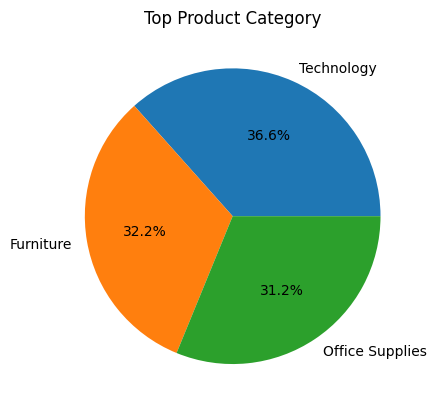

In [41]:
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')
plt.title('Top Product Category')
plt.show()

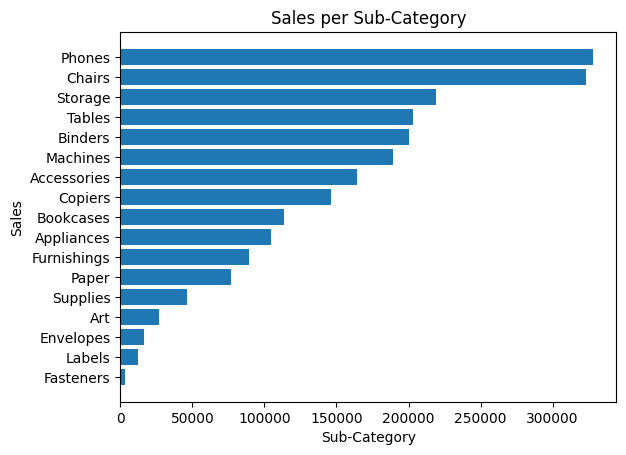

In [45]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])
plt.title('Sales per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()
# print(subcategory_count_sales.head(10).reset_index(drop=True))

In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales': 'Total Sales'})
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


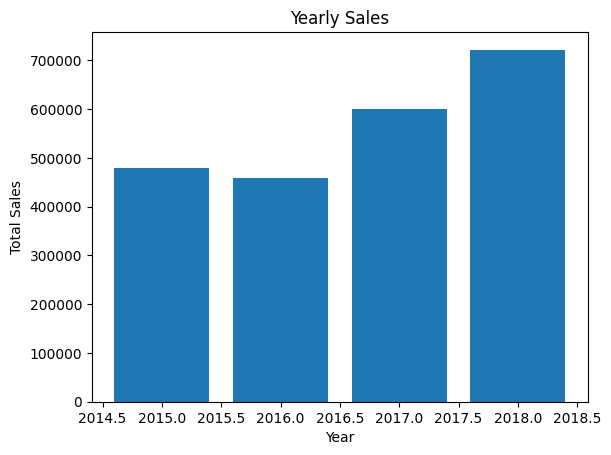

In [47]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

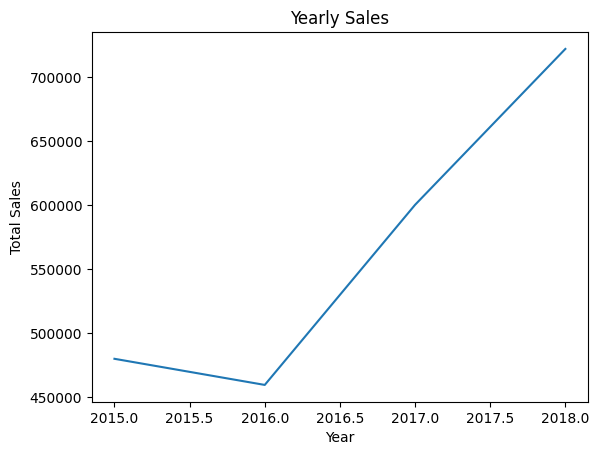

In [48]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [50]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales': 'Total Sales'})
print(quarterly_sales)

     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


<ipython-input-50-a89d52e9a370>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()


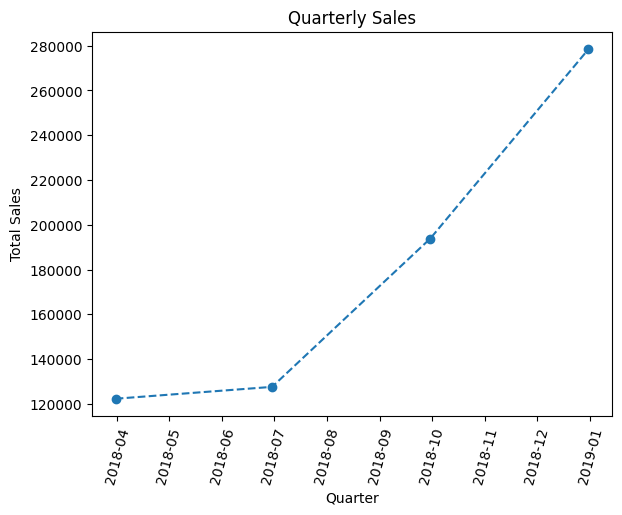

In [55]:
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle='--')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [56]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Total Sales'})
print(monthly_sales)

        Month  Total Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


<ipython-input-56-a79c79e00158>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum()


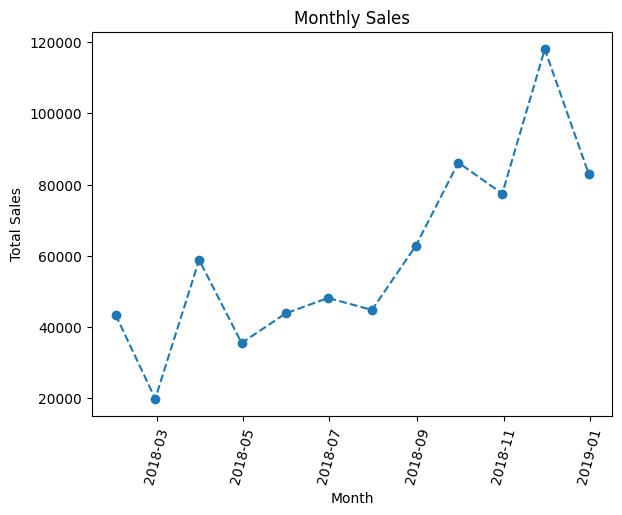

In [58]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker = 'o', linestyle='--')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [68]:
# Initialize plotly in jupyter notebook
from re import L
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Create a mapping for all 50 states
all_state_mapping = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

# Add the abbreviation column to the dataframe
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# create a choropleth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    z=sum_of_sales['Sales'],
    locationmode='USA-states',
    colorbar_title='Sales',
    hoverinfo='location+z',
    text=sum_of_sales['State'],
    showscale=True
))

fig.update_geos(projection_type='albers usa')
fig.update_layout(
    title_text='Sales per State',
    geo_scope='usa',
)

fig.show()

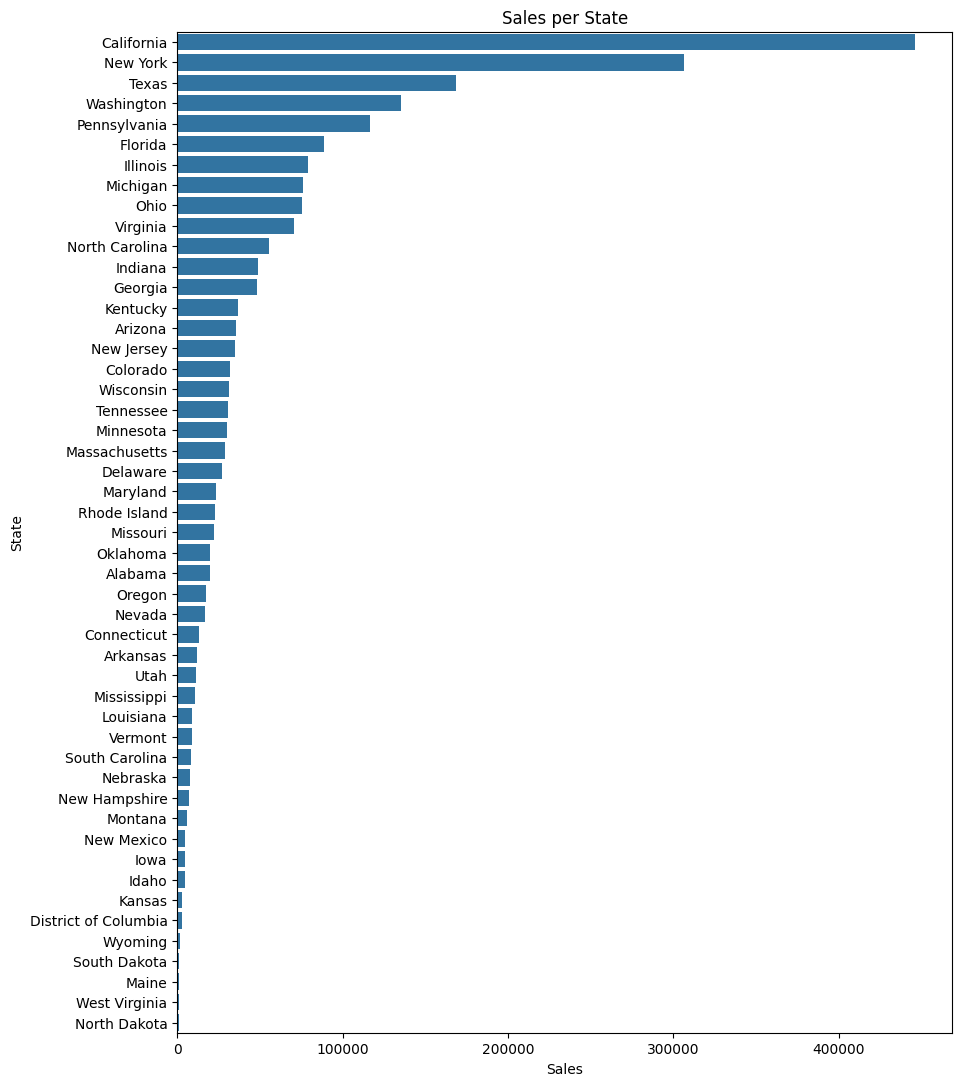

In [69]:
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)
ax.set_xlabel('Sales')
ax.set_ylabel('State')
ax.set_title('Sales per State')
plt.show()

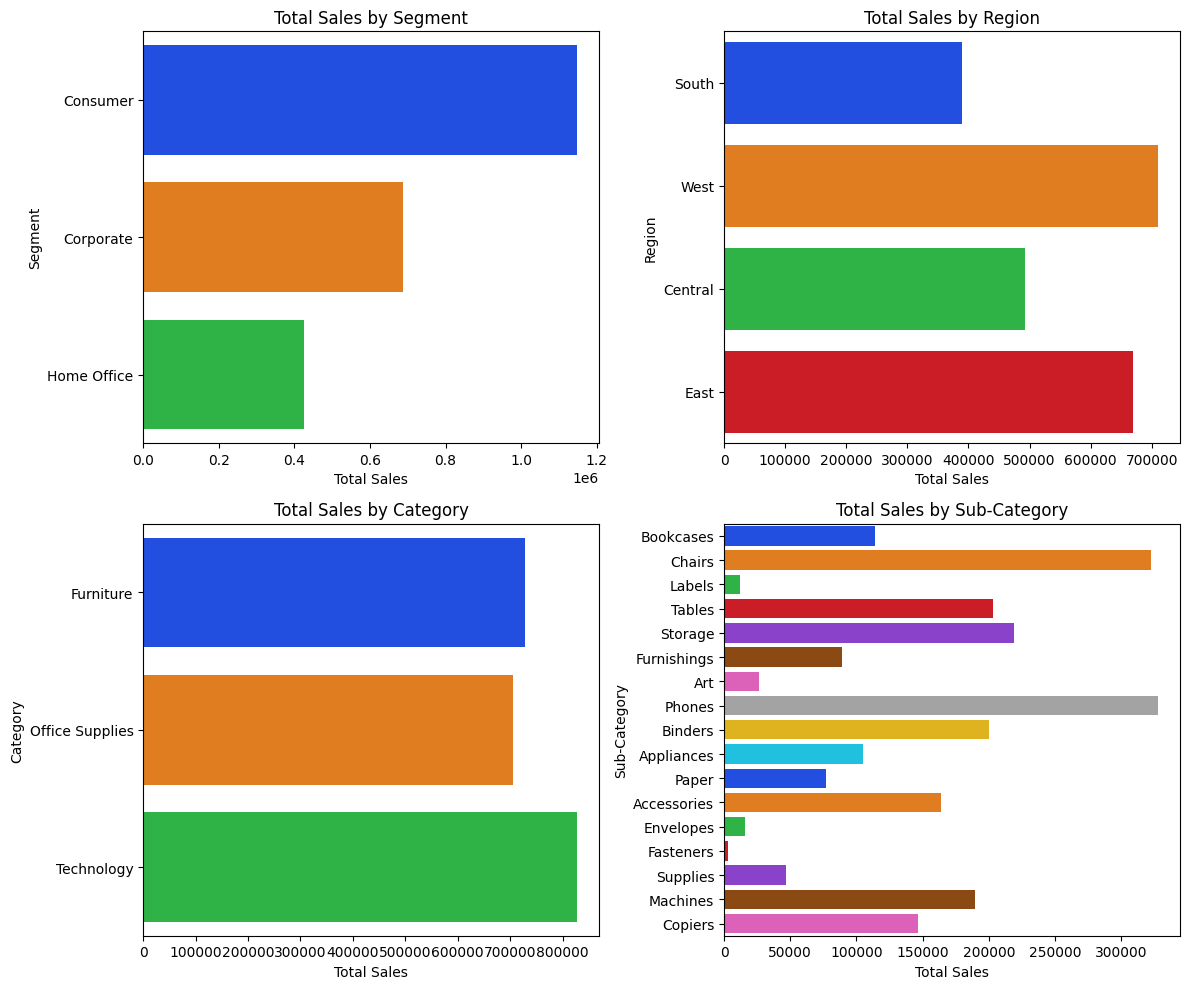

In [76]:
# Adjust the layout and spacing of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)  # Corrected line

columns = ['Segment', 'Region', 'Category', 'Sub-Category']

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x='Sales', y=column, data=df, ax=ax, estimator=np.sum, errorbar=None, palette='bright', hue=column)
    ax.set_title(f'Total Sales by {column}')
    ax.set_xlabel('Total Sales')
    ax.set_ylabel(column)

plt.tight_layout()  # Optional: to further adjust spacing
plt.show()

In [78]:
import plotly.express as px

df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

fig = px.sunburst(df_summary, path=['Category', 'Sub-Category'], values='Sales',
                  color='Sales', color_continuous_scale='RdBu',
                  title='Sales by Category and Sub-Category')

fig.show()

In [72]:
df_summary = df.groupby(['Category', 'Ship Mode','Sub-Category'])['Sales'].sum().reset_index()

fig = px.treemap(df_summary, path=['Category', 'Ship Mode','Sub-Category'], values='Sales',
                  color='Sales', color_continuous_scale='RdBu',
                  title='Sales by Category, Ship Mode and Sub-Category')

fig.show()